In [21]:
import numpy as np 
# linear algebra
import pandas as pd 
# data processing, CSV file I/O (e.g. pd.read_csv)

In [22]:
movies = pd.read_csv('E:/Sem 5 notes and lab/DA Assignment/tmdb_5000_movies.csv')
credits = pd.read_csv('E:/Sem 5 notes and lab/DA Assignment/tmdb_5000_credits.csv')
#reading 2 datasets from specified locations

In [23]:
movies.head(5)
#displaying first 5 tuples from movies dataframe

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [24]:
movies.shape 
#gives us number of rows and columns in movies dataframe

(4803, 20)

In [25]:
credits.head(5)
#displaying first 5 tuples from credits dataframe

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [26]:
credits.shape
#gives us number of rows and columns in credits dataframe

(4803, 4)

In [27]:
#For checking missing values using missingno library
import missingno as msno 

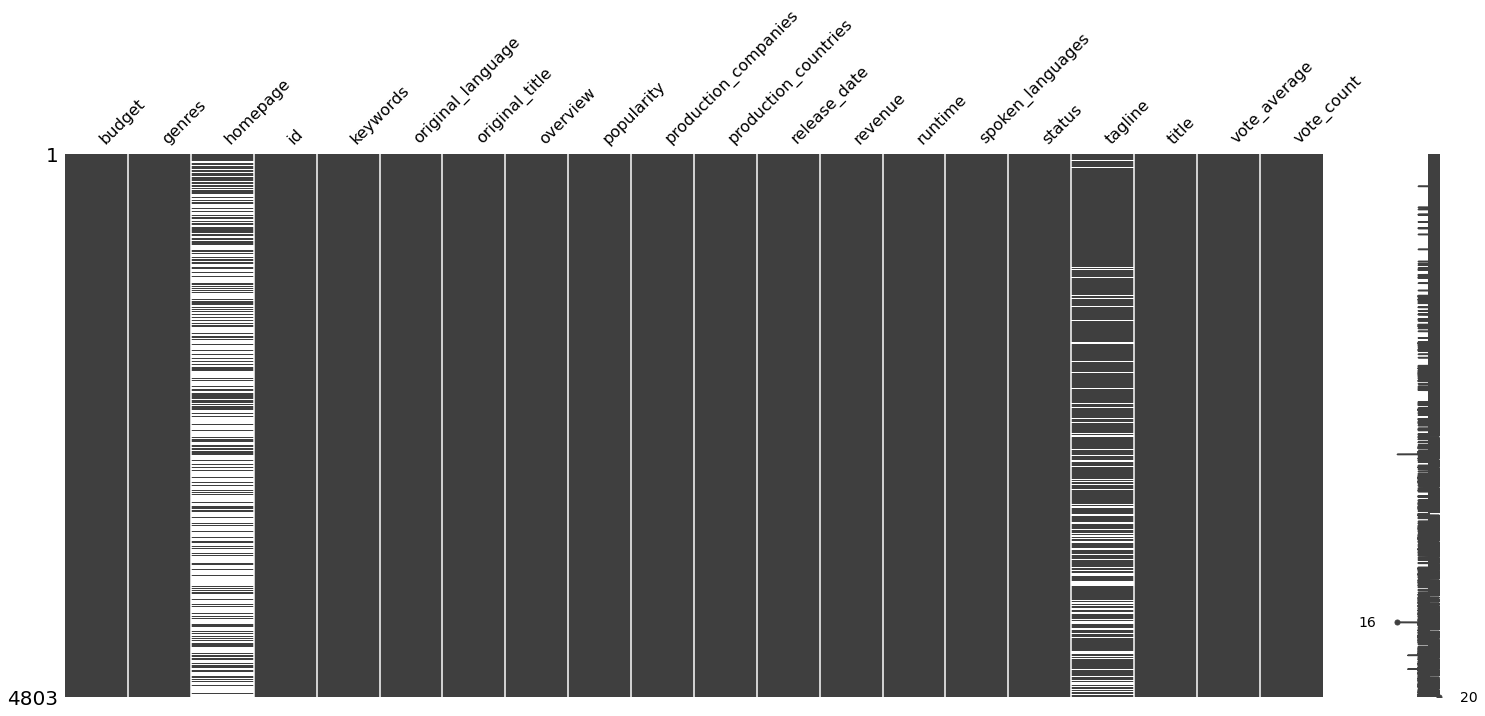

In [28]:
msno.matrix(movies); #quickly visually pick out patterns in data completion

In [29]:
#The missing values in the home page and tagline will not effect our analysis as we are not focusing on these columns

In [30]:
#Print sample of Genres columns
print ('Sample of Geners Column\n'  , movies.genres[0])
print ("_"*40)

Sample of Geners Column
 [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]
________________________________________


In [31]:
#Creating the Conversion function
import ast
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [32]:
movies['genres'] = movies['genres'].apply(convert)
print('Sample of Geners Column\n'  , movies.genres[0])
print("_"*40)

Sample of Geners Column
 ['Action', 'Adventure', 'Fantasy', 'Science Fiction']
________________________________________


In [33]:
#EDA for the Genres (Independant Varaible)

In [34]:
#Getting the frequency in Counter() and converting it to dataframe
from collections import Counter
geners = Counter()
for i in range(movies.shape[0]):
    for j in movies.genres[i]:
        geners[j]+=1
Geners_df = pd.DataFrame.from_dict(geners, orient='index').reset_index()
Geners_df = Geners_df.rename(columns = {'index': 'Geners' ,0: 'Frequency'})
Geners_df.head(10)

,Geners,Frequency
0,Action,1154
1,Adventure,790
2,Fantasy,424
3,Science Fiction,535
4,Crime,696
5,Drama,2297
6,Thriller,1274
7,Animation,234
8,Family,513
9,Western,82


In [35]:
#Mapping the the dependant variables average of: (vote_count , vote_average , Popularity , budget , revenue ) from the Original df to the genres df

In [36]:
generes_list = Geners_df.Geners.tolist()

Geners_Vote_Average = {}
Geners_Vote_Count = {}
Geners_Popularity = {}
Geners_budget = {}
Geners_revenue = {}

for j in generes_list:
    gener = []
    for i in range (movies.shape[0]):
        if j in  movies.genres[i]:
            gener.append(movies.vote_average[i])
            Geners_Vote_Average[j] = sum(gener)/len(gener)
            
for j in generes_list:
    gener = []
    for i in range (movies.shape[0]):
        if j in  movies.genres[i]:
            gener.append(movies.vote_count[i])
            Geners_Vote_Count[j] = sum(gener)/len(gener)
            
for j in generes_list:
    gener = []
    for i in range (movies.shape[0]):
        if j in  movies.genres[i]:
            gener.append(movies.popularity[i])
            Geners_Popularity[j] = sum(gener)/len(gener)

for j in generes_list:
    gener = []
    for i in range (movies.shape[0]):
        if j in  movies.genres[i]:
            gener.append(movies.budget[i])
            Geners_budget[j] = sum(gener)/len(gener)

            
for j in generes_list:
    gener = []
    for i in range (movies.shape[0]):
        if j in  movies.genres[i]:
            gener.append(movies.revenue[i])
            Geners_revenue[j] = sum(gener)/len(gener)

                                              


                                              
Geners_df['Average_Vote_Average'] = Geners_df.Geners.map(Geners_Vote_Average)
Geners_df['Average_Vote_Count'] = Geners_df.Geners.map(Geners_Vote_Count)
Geners_df['Average_Popularity'] = Geners_df.Geners.map(Geners_Popularity)
Geners_df['Average_budget'] = Geners_df.Geners.map(Geners_budget)
Geners_df['Average_revenue'] = Geners_df.Geners.map(Geners_revenue)
# Round the Budget and revenue to the million
Geners_df['Average_budget'] = Geners_df['Average_budget']/1000000
Geners_df['Average_revenue']  = Geners_df['Average_revenue'] /1000000

In [37]:
Geners_df.style.background_gradient(cmap='YlGnBu')

,Geners,Frequency,Average_Vote_Average,Average_Vote_Count,Average_Popularity,Average_budget,Average_revenue
0,Action,1154,5.989515,1135.814558,30.940382,51.510751,141.213098
1,Adventure,790,6.156962,1430.669620,39.268042,66.326861,208.660204
2,Fantasy,424,6.096698,1323.983491,36.387043,63.560605,193.354245
3,Science Fiction,535,6.005607,1425.585047,36.451806,51.865551,152.456515
4,Crime,696,6.274138,752.599138,22.853274,27.849808,66.150662
5,Drama,2297,6.388594,532.280801,17.764853,20.678325,52.116232
6,Thriller,1274,6.010989,772.845369,24.460077,31.968207,81.044291
7,Animation,234,6.341453,1246.170940,38.813439,66.465902,225.693025
8,Family,513,6.029630,902.290448,27.832849,50.719512,162.345495
9,Western,82,6.178049,607.853659,18.236279,27.078702,46.245965


In [38]:
#Plotting liberaries
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import missingno as msno #https://github.com/ResidentMario/missingno

# upsupervised liberaries
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Stop warnings
import warnings
warnings.filterwarnings("ignore")

Text(5, 200, 'Animation , Adventure\n       Fantasy')

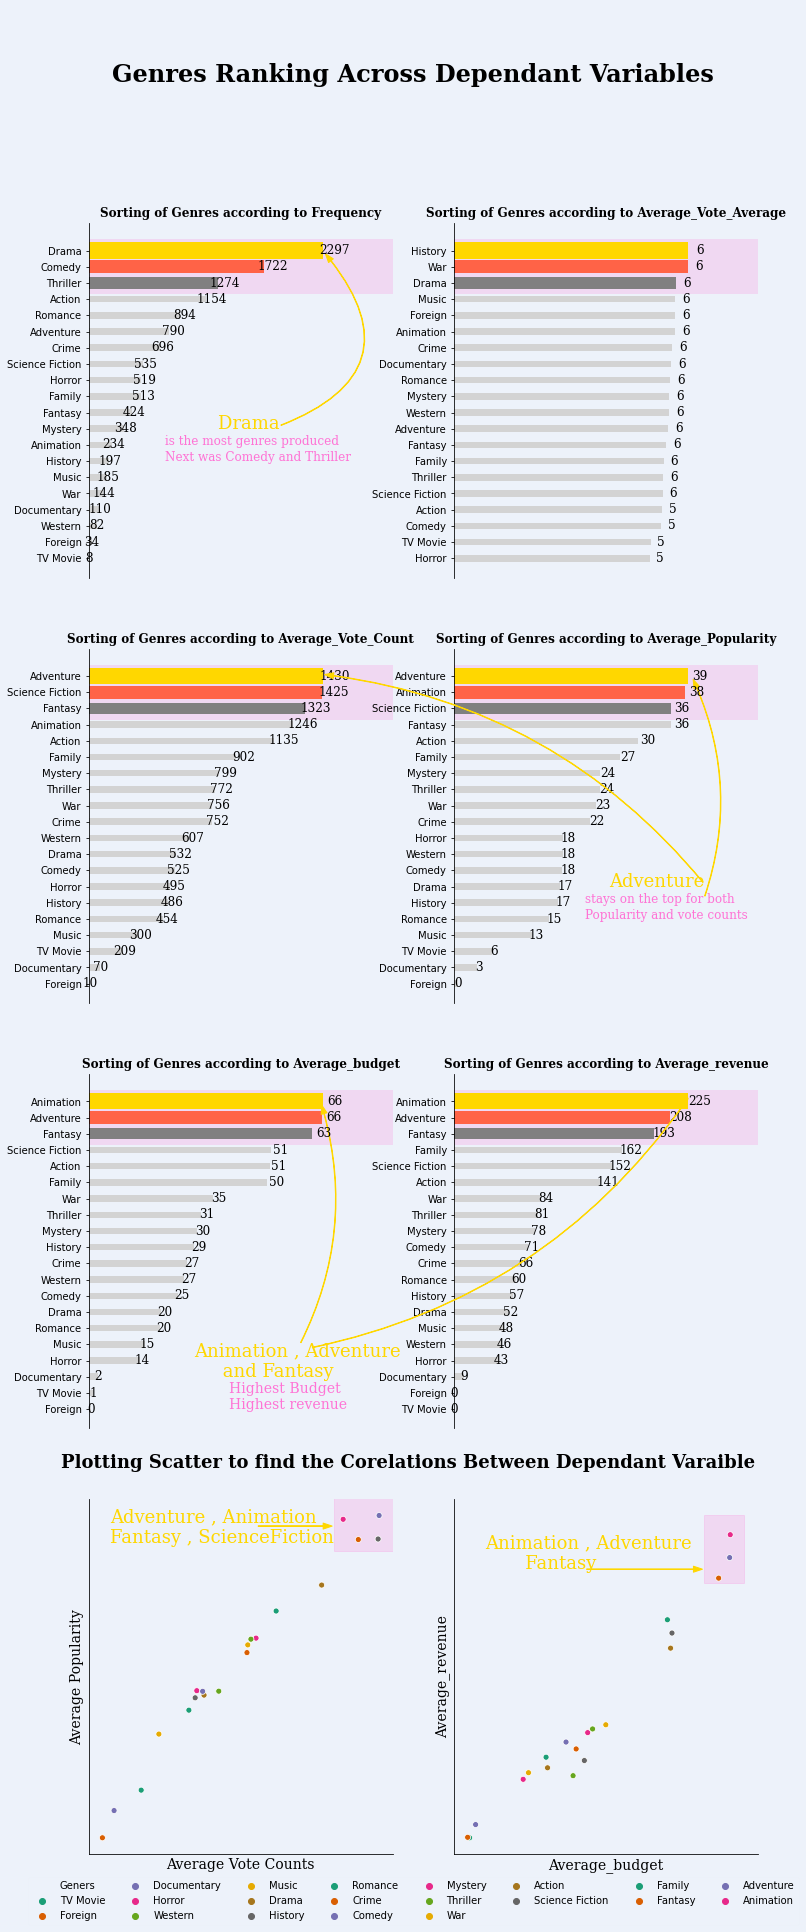

In [39]:
# Create dependant variables list to use it in for loop
dependant_variables = ['Frequency', 'Average_Vote_Average', 'Average_Vote_Count',
                       'Average_Popularity', 'Average_budget', 'Average_revenue']
#Set the size of the horizontal bars
h = np.array([0.4,0.4 ,0.4 ,0.4 ,0.4 ,0.4,0.4 ,0.4,
             0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.7,0.8,1])
#Set the Colors of the bars
c = np.array(['lightgray','lightgray' ,'lightgray' ,'lightgray' ,'lightgray' ,'lightgray',
              'lightgray' ,'lightgray',
             'lightgray','lightgray','lightgray'
              ,'lightgray','lightgray','lightgray','lightgray',
              'lightgray','lightgray','gray','tomato','gold'])
#Create the figure and the axis 
fig , ax = plt.subplots(nrows = 4, ncols = 2 , figsize = [12,30])
#set the figure background color
fig.patch.set_facecolor('#edf2fa')
#Figure Title
fig.suptitle('\n\nGenres Ranking Across Dependant Variables', fontfamily='serif',
                   fontsize = 24 , fontweight='bold' )
#for loop (axis and variable ) to generate the barh plot 
for axes , variable in zip (ax.flatten() , dependant_variables):
    #Sorting the Genres dataframe by virables
    Geners_df = Geners_df.sort_values(by = variable )
    #Barh plot using Matplotlib
    axes.barh(Geners_df.Geners ,Geners_df[variable] , height = h  , color = c)
    #set the axes background color
    axes.set_facecolor('#edf2fa')
    #set the x limit
    mx = Geners_df[variable].max()*1.3
    axes.set_xlim(0 , mx)
    #Create a background diffrent color for the top three Genres
    axes.axhspan(ymin = 16.3 , ymax = 19.7 , fc='#ff73d5', alpha=0.2 , zorder=0)
    #remove the Axes Boundary except the Left side
    for s in ['top', 'right', 'bottom']:
         axes.spines[s].set_visible(False)
    #add the notation on the bars
    for patch in axes.patches:
        try:
            #try exepct technique was used becouse the axhspan has no attrebuite get_width nor get_height
            bl = patch.get_xy()
            x = 1.05 * patch.get_width() + bl[0]
            y = 0.5 * patch.get_height() + bl[1] 
            axes.text(x,y,"%d" %(patch.get_width()),va='center',ha='center' , 
                      color = 'black',fontsize = 12, fontfamily='serif')
        except:
            #skip and go to next patch
            continue
    #Get it more clean and remove the useless ticks and labels
    axes.set_xticks([])
    axes.set_xlabel("")
    axes.set_ylabel("")
    axes.set_title(f"Sorting of Genres according to {variable}" , fontfamily='serif',
                   fontsize = 12 , fontweight='bold')
    #End of for loop
    

#Add some text on the visualization 
ax[0,0].text(1270, 8, 'Drama ', fontsize=18, fontfamily='serif', color = 'Gold')
ax[0,0].text(750, 7, 'is the most genres produced ', fontsize=12, fontfamily='serif', color = '#ff73d5')
ax[0,0].text(750, 6, 'Next was Comedy and Thriller', fontsize=12,  fontfamily='serif', color = '#ff73d5');


ax[1,1].text(26, 6, 'Adventure',  fontsize=18,   fontfamily='serif', color = 'Gold')
ax[1,1].text(22, 5,  'stays on the top for both ', fontsize=12,  fontfamily='serif', color = '#ff73d5')
ax[1,1].text(22, 4, 'Popularity and vote counts', fontsize=12,  fontfamily='serif', color = '#ff73d5');


ax[2,0].text(30, 2,  'Animation , Adventure\n     and Fantasy', fontsize=18,  fontfamily='serif', color = 'Gold')
ax[2,0].text(40, 0,  'Highest Budget \nHighest revenue ', fontsize=14,  fontfamily='serif', color = '#ff73d5');

#lets add some arrows
#https://stackoverflow.com/questions/44526103/matplotlib-draw-curved-arrow-that-looks-just-like-pyplot-arrow
style = "Simple, tail_width=0.5, head_width=6, head_length=9"
kw = dict(arrowstyle=style, color="Gold")
a = patches.FancyArrowPatch((1870, 8.17), (2310, 18.9),connectionstyle="arc3,rad=.7", **kw)
ax[0,0].add_patch(a)
a2 = patches.FancyArrowPatch((42, 5.30), (40, 18.9),connectionstyle="arc3,rad=.2", **kw)
ax[1,1].add_patch(a2)
a3 = patches.FancyArrowPatch((60 , 4), (66, 18.9),connectionstyle="arc3,rad=.2", **kw)
ax[2,0].add_patch(a3)

# Create the arrow across two supblots
#https://www.cilyan.org/blog/2016/01/23/matplotlib-draw-between-subplots/
# 1. Get transformation operators for axis and figure
ax0tr = ax[1,0].transData # Axis 0 -> Display
ax1tr = ax[1,1].transData # Axis 1 -> Display
figtr = fig.transFigure.inverted() # Display -> Figure
# 2. Transform arrow start point from axis 0 to figure coordinates
ptE = figtr.transform(ax0tr.transform((1430, 0.047)))
# 3. Transform arrow end point from axis 1 to figure coordinates
ptB = figtr.transform(ax1tr.transform((42, -0.018)))
# Place arrow in figure coord system
arrow = patches.FancyArrowPatch(ptB, ptE, transform=fig.transFigure, connectionstyle="arc3,rad=0.2" , **kw)
# 5. Add patch to list of objects to draw onto the figure
fig.patches.append(arrow)


# 1. Get transformation operators for axis and figure
ax0tr = ax[2,0].transData # Axis 0 -> Display
ax1tr = ax[2,1].transData # Axis 1 -> Display
figtr = fig.transFigure.inverted() # Display -> Figure
# 2. Transform arrow start point from axis 0 to figure coordinates
ptB = figtr.transform(ax0tr.transform((63, -.03)))
# 3. Transform arrow end point from axis 1 to figure coordinates
ptE = figtr.transform(ax1tr.transform((227, 0.048)))
# Place arrow in figure coord system
arrow2 = patches.FancyArrowPatch(ptB, ptE, transform=fig.transFigure, connectionstyle="arc3,rad=0.2" , **kw)
# 5. Add patch to list of objects to draw onto the figure
fig.patches.append(arrow2)

# adding the scatter Plots
sns.scatterplot(x = Geners_df.Average_Vote_Count , y = Geners_df.Average_Popularity  , 
           data=movies , hue =Geners_df.Geners , ax = ax[3,0] ,
                legend = False , palette="Dark2")
ax[3,0].set_facecolor('#edf2fa')
for s in ['top', 'right']:
    ax[3,0].spines[s].set_visible(False)
ax[3,0].set_xticks([])
ax[3,0].set_yticks([])
ax[3,0].set_xlabel("Average Vote Counts" ,fontsize=14,   fontfamily='serif')
ax[3,0].set_ylabel("Average Popularity" , fontsize=14,   fontfamily='serif')
ax[3,0].text( -200,45 ,"Plotting Scatter to find the Corelations Between Dependant Varaible" , fontfamily='serif',
                   fontsize = 18 , fontweight='bold')

sns.scatterplot(x = Geners_df.Average_budget , y = Geners_df.Average_revenue  , 
        data=movies, hue =Geners_df.Geners , ax = ax[3,1] , legend = "full" , palette="Dark2")
plt.legend(bbox_to_anchor=(-1.40, -.20), loc="lower left", borderaxespad=0. , ncol=8 , 
          facecolor='#edf2fa' , framealpha=.01)
ax[3,1].set_facecolor('#edf2fa')

for s in ['top', 'right']:
    ax[3,1].spines[s].set_visible(False)
ax[3,1].set_xticks([])
ax[3,1].set_yticks([])
ax[3,1].set_xlabel("Average_budget" ,fontsize=14,   fontfamily='serif')
ax[3,1].set_ylabel("Average_revenue" , fontsize=14,   fontfamily='serif');


ax[3,0].add_patch(plt.Rectangle((1200, 35), 600 , 50, color='#ff73d5', alpha=0.2 , zorder = 0))


style = "Simple, tail_width=0.5, head_width=6, head_length=9"
kw = dict(arrowstyle=style, color="Gold")
ax[3,0].add_patch(patches.FancyArrowPatch((800, 38), (1200, 38) , **kw))
ax[3,0].text(50, 36,  'Adventure , Animation\nFantasy , ScienceFiction', fontsize=18,  fontfamily='serif', color = 'Gold')

    
ax[3,1].add_patch(plt.Rectangle((60, 190),10 , 50, color='#ff73d5', alpha=0.2 , zorder = 0))


style = "Simple, tail_width=0.5, head_width=6, head_length=9"
kw = dict(arrowstyle=style, color="Gold")
ax[3,1].add_patch(patches.FancyArrowPatch((30, 200), (60, 200) , **kw))
ax[3,1].text(5, 200,  'Animation , Adventure\n       Fantasy', fontsize=18,  fontfamily='serif', color = 'Gold')

In [40]:
"""Conclusion of Genres analysis
Most produced genres in the list : [Drama / Comedy]
Most Vote counts goes to : [Adventure /Science Fiction]
Highest popularity : [Adventure / Animation]
Highest Budget : [Animation / Advenure]
Highest Revenue : [Animation / Advenure]"""

'Conclusion of Genres analysis\nMost produced genres in the list : [Drama / Comedy]\nMost Vote counts goes to : [Adventure /Science Fiction]\nHighest popularity : [Adventure / Animation]\nHighest Budget : [Animation / Advenure]\nHighest Revenue : [Animation / Advenure]'

In [41]:
credits.head(1)['cast'].values
#extracting all the values from the attribute cast of the 1st record

array(['[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "ge

In [42]:
credits.head(1)['crew'].values
#extracting all the values from the attribute crew of the 1st tuple in credits dataframe

array(['[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cam

In [43]:
movies = movies.merge(credits,on='title')
#merging the dataframe movies with dataframe credits on the basis of title column, as it is hectic to deal with 2 seperate dataframes
#dataframe is reassigned to movies in order to account for duplicate columns like 'title'

In [44]:
movies.shape
#the merged dataframe has same shape as the individual datasets, thereby having consistency

(4809, 23)

In [45]:
movies.head(5)
# budget
# homepage
# id
# original_language
# original_title
# popularity
# production_comapny
# production_countries
# release-date(not sure)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [46]:
movies.info()
#displaying all column names along with their datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [47]:
movies['original_language'].value_counts()
#accounting for the count of the movies in each language

en    4510
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
ko      12
cn      12
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
he       3
th       3
ro       2
cs       2
ar       2
ta       2
id       2
ps       1
vi       1
el       1
no       1
nb       1
tr       1
te       1
af       1
ky       1
hu       1
is       1
xx       1
sl       1
pl       1
Name: original_language, dtype: int64

In [48]:
#movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]
#taking only specific columns to continue further, we retain only columns which contributes to tags as it is a content based recommendation system
#dropped columns:
#budget-it doesn't help in creating tags as the likliness of the movie doesn't depend on its budget
#homepage-it is actually meaningless in recommender system
#original_language-This attribute is actually important , but as it can be seen from the above numbers majority of the movies are in english.So this attribute doesn't count much to tags
#original_title-recommendation can't be done on title, also title can be retained removing original_title
#popularity-This is one among the important attribute in recommendation system but not in content based
#production_companies-Not so important
#production_countries-Not important
#release_date-Important but not frequently used in content based
#revenue-Not important
#runtime-Not important
#spoken_languages-Not so important as our project is mainly focused on content,anyways subtitles can be accomodated
#status-whether it is released or not is not important to recommend ,because you could recommend once it is in the database
#tagline-At everytime tagline wouldn't be  that specific to a movie
#vote_average,vote_count-numerical , don't account for content
#movie_id-Id is already retained

In [49]:
movies.head(10)
#displaying first 10 values from dataframe

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
5,258000000,"[Fantasy, Action, Adventure]",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576,559,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."
6,260000000,"[Animation, Family]",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330,38757,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de..."
7,280000000,"[Ac

In [50]:
movies.isnull().sum()
#checking for null values as we need it for tags

budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64

In [51]:
movies.dropna(inplace=True)
#dropping records with overview being null , as there are only 3 such tuples also these values can't be inculcated using any numerical measures.
#inplace=True ,not to return any new dataframe

In [52]:
movies.loc[movies.astype(str).drop_duplicates().index]
#movies.duplicated().sum()
#checking for the duplicated values, it is checked on the basis of all the attributes

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779,27000,[Comedy],http://www.miramax.com/movie/clerks/,2292,"[{""id"": 1361, ""name"": ""salesclerk""}, {""id"": 30...",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755,2292,"[{""cast_id"": 7, ""character"": ""Dante Hicks"", ""c...","[{""credit_id"": ""52fe434ac3a36847f8049253"", ""de..."
4787,22000,"[Comedy, Romance]",https://www.facebook.com/DrySpellMovie,255266,"[{""id"": 13043, ""name"": ""dating""}, {""id"": 15160...",en,Dry Spell,Sasha tries to get her soon-to-be ex husband K...,0.048948,[],...,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Getting divorced does funny things to a girl,Dry Spell,6.0,1,255266,"[{""cast_id"": 4, ""character"": ""Sasha"", ""credit_...","[{""credit_id"": ""52fe4ee39251416c911412e7"", ""de..."
4797,13,[

In [53]:
#movies.loc[movies.astype(str).drop_duplicates().index].loc[0,'X']

In [54]:
movies.isnull().sum()
#rechecking for the count of null values

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
movie_id                0
cast                    0
crew                    0
dtype: int64

In [55]:
movies.shape

(1494, 23)

In [56]:
movies.iloc[0].genres
# genre in 0th row 

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [57]:
#'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'
# ['Action','Adventure','Fantasy','Science Fiction']

In [58]:
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')
#to convert string of list into a list

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [59]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L
#helper function to format

In [60]:
#movies['genres'] = movies['genres'].apply(convert)
#movies.head()
#applying the helper function on genres and storing it back into the same column

In [61]:
movies['genres']

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4779                                         [Comedy]
4787                                [Comedy, Romance]
4797                                         [Horror]
4802               [Science Fiction, Drama, Thriller]
4807                                               []
Name: genres, Length: 1494, dtype: object

In [62]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [63]:
movies['keywords']

0       [culture clash, future, space war, space colon...
1       [ocean, drug abuse, exotic island, east india ...
2       [spy, based on novel, secret agent, sequel, mi...
3       [dc comics, crime fighter, terrorist, secret i...
4       [based on novel, mars, medallion, space travel...
                              ...                        
4779             [salesclerk, loser, aftercreditsstinger]
4787    [dating, divorce, sex scene, sex comedy, anti ...
4797                                      [home invasion]
4802    [distrust, garage, identity crisis, time trave...
4807                                                   []
Name: keywords, Length: 1494, dtype: object

In [64]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1494 entries, 0 to 4807
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                1494 non-null   int64  
 1   genres                1494 non-null   object 
 2   homepage              1494 non-null   object 
 3   id                    1494 non-null   int64  
 4   keywords              1494 non-null   object 
 5   original_language     1494 non-null   object 
 6   original_title        1494 non-null   object 
 7   overview              1494 non-null   object 
 8   popularity            1494 non-null   float64
 9   production_companies  1494 non-null   object 
 10  production_countries  1494 non-null   object 
 11  release_date          1494 non-null   object 
 12  revenue               1494 non-null   int64  
 13  runtime               1494 non-null   float64
 14  spoken_languages      1494 non-null   object 
 15  status               

In [65]:
#Movie Recommendation Based on Weighted Average Scores(TMDB Dataset)
#W = (Rv+Cm)/(v+m)
#W = Weighted Rating
#R = average for the movie(0 to 10) = Rating
#v = number of votes for the movie
#m = minimum votes required to be listed in Top 250
#C = Mean vote across whole Report

In [66]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1494 entries, 0 to 4807
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                1494 non-null   int64  
 1   genres                1494 non-null   object 
 2   homepage              1494 non-null   object 
 3   id                    1494 non-null   int64  
 4   keywords              1494 non-null   object 
 5   original_language     1494 non-null   object 
 6   original_title        1494 non-null   object 
 7   overview              1494 non-null   object 
 8   popularity            1494 non-null   float64
 9   production_companies  1494 non-null   object 
 10  production_countries  1494 non-null   object 
 11  release_date          1494 non-null   object 
 12  revenue               1494 non-null   int64  
 13  runtime               1494 non-null   float64
 14  spoken_languages      1494 non-null   object 
 15  status               

In [67]:
v = movies['vote_count']
R = movies['vote_average']
C = movies['vote_average'].mean()
m = movies['vote_count'].quantile(0.70)    # Movies > 70th percentile votes

In [68]:
movies['weighted_avg'] = ((R*v)+(C*m))/(v+m)
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew,weighted_avg
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.103391
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.753448
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.293688
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.426141
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.167989


In [69]:
sorted_ranking = movies.sort_values('weighted_avg', ascending=False)
sorted_ranking

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew,weighted_avg
662,63000000,[Drama],http://www.foxmovies.com/movies/fight-club,550,"[support group, dual identity, nihilism, rage ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,550,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",8.041978
65,185000000,"[Drama, Action, Crime, Thriller]",http://thedarkknight.warnerbros.com/dvdsite/,155,"[dc comics, crime fighter, secret identity, sc...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,The Dark Knight,8.2,12002,155,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",8.002189
3342,6000000,"[Drama, Crime]",http://www.thegodfather.com/,238,"[italy, love at first sight, loss of father, p...",en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,An offer you can't refuse.,The Godfather,8.4,5893,238,"[{""cast_id"": 5, ""character"": ""Don Vito Corleon...","[{""credit_id"": ""52fe422bc3a36847f80093c9"", ""de...",7.998084
96,160000000,"[Action, Thriller, Science Fiction, Mystery, A...",http://inceptionmovie.warnerbros.com/,27205,"[loss of lover, dream, kidnapping, sleep, subc...",en,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Your mind is the scene of the crime.,Inception,8.1,13752,27205,"[{""cast_id"": 1, ""character"": ""Dom Cobb"", ""cred...","[{""credit_id"": ""56e8462cc3a368408400354c"", ""de...",7.934154
95,165000000,"[Adventure, Drama, Science Fiction]",http://www.interstellarmovie.net/,157336,"[saving the world, artificial intelligence, fa...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,157336,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de...",7.895064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,200000000,"[Adventure, Action, Thriller, Science Fiction]",http://greenlanternmovie.warnerbros.com/,44912,"[dc comics, transformation, superhero, alien, ...",en,Green Lantern,"For centuries, a small but powerful force of w...",51.872839,"[{""name"": ""De Line Pictures"", ""id"": 2609}, {""n...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"In our darkest hour, there will be light.",Green Lantern,5.1,2487,44912,"[{""cast_id"": 6, ""character"": ""Hal Jordan / Gre...","[{""credit_id"": ""52fe46a3c3a36847f8109f09"", ""de...",5.517312
337,92000000,"[Action, Thriller]",http://www.diehardmovie.com/,47964,"[bomb, cia, russia, escape, courthouse, rogue,...",en,A Good Day to Die Hard,"Iconoclastic, take-no-prisoners cop John McCla...",65.402595,"[{""name"": ""Ingenious Media"", ""id"": 290}, {""nam...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Yippee Ki-Yay Mother Russia,A Good Day to Die Hard,5.2,3493,47964,"[{""cast_id"": 1, ""character"": ""John McClane"", ""...","[{""credit_id"": ""5336b04a9251417db4000c

In [70]:
sorted_ranking[['original_title', 'vote_count', 'vote_average', 'weighted_avg', 'popularity']].head(20)

,original_title,vote_count,vote_average,weighted_avg,popularity
662,Fight Club,9413,8.3,8.041978,146.757391
65,The Dark Knight,12002,8.2,8.002189,187.322927
3342,The Godfather,5893,8.4,7.998084,143.659698
96,Inception,13752,8.1,7.934154,167.583710
95,Interstellar,10867,8.1,7.895064,724.247784
1996,The Empire Strikes Back,5879,8.2,7.835175,78.517830
329,The Lord of the Rings: The Return of the King,8064,8.1,7.834194,123.630332
1824,Schindler's List,4329,8.3,7.811925,104.469351
3872,Whiplash,4254,8.3,7.805419,192.528841
2917,Star Wars,6624,8.1,7.786332,126.393695


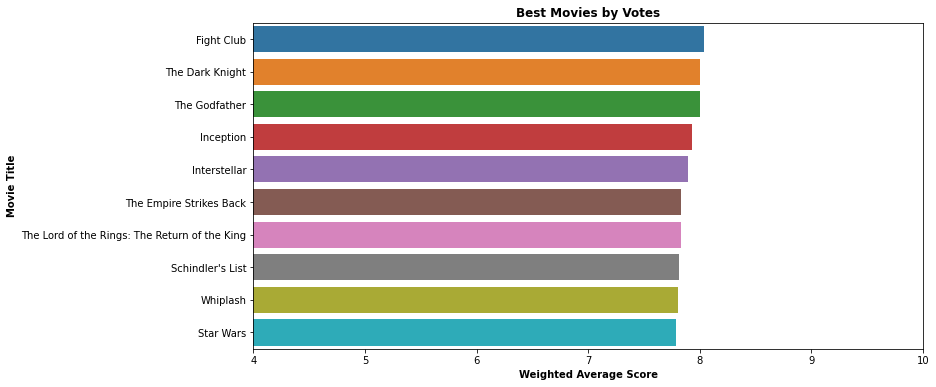

In [71]:
from sklearn.preprocessing import MinMaxScaler
weight_avg = sorted_ranking.sort_values('weighted_avg', ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x = weight_avg['weighted_avg'].head(10), y=weight_avg['original_title'].head(10), data=weight_avg)
plt.xlim(4, 10)
plt.title("Best Movies by Votes", weight="bold")
plt.xlabel("Weighted Average Score", weight="bold")
plt.ylabel("Movie Title", weight="bold")
plt.show()

In [72]:
popularity = sorted_ranking.sort_values('popularity', ascending=False)
popularity.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew,weighted_avg
546,74000000,"[Family, Animation, Adventure, Comedy]",http://www.minionsmovie.com/,211672,"[assistant, aftercreditsstinger, duringcredits...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,211672,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de...",6.370700
95,165000000,"[Adventure, Drama, Science Fiction]",http://www.interstellarmovie.net/,157336,"[saving the world, artificial intelligence, fa...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,157336,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de...",7.895064
788,58000000,"[Action, Adventure, Comedy]",http://www.foxmovies.com/movies/deadpool,293660,"[anti hero, mercenary, marvel comic, superhero...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,293660,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D...","[{""credit_id"": ""56c986b2925141172f0068b6"", ""de...",7.274899
94,170000000,"[Action, Science Fiction, Adventure]",http://marvel.com/guardians,118340,"[marvel comic, spaceship, space, outer space, ...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742,118340,"[{""cast_id"": 1, ""character"": ""Peter Quill / St...","[{""credit_id"": ""538ce329c3a3687155003358"", ""de...",7.699029
127,150000000,"[Action, Adventure, Science Fiction, Thriller]",http://www.madmaxmovie.com/,76341,"[future, chase, post-apocalyptic, dystopia, au...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What a Lovely Day.,Mad Max: Fury Road,7.2,9427,76341,"[{""cast_id"": 2, ""character"": ""Max Rockatansky""...","[{""credit_id"": ""577da370c3a36817f8003838"", ""de...",7.082164
28,150000000,"[Action, Adventure, Science Fiction, Thriller]",http://www.jurassicworld.com/,135397,"[monster, dna, tyrannosaurus rex, velociraptor...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662,135397,"[{""cast_id"": 10, ""character"": ""Owen Grady"", ""c...","[{""credit_id"": ""52fe4bf7c3a368484e1a0683"", ""de...",6.468961
199,140000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneyvideos/liveaction/p...,22,"[exotic island, blacksmith, east india trading...",en,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 17th-century pira...",271.972889,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Prepare to be blown out of the water.,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985,22,"[{""cast_id"": 12, ""character"": ""Captain Jack Sp...","[{""credit_id"": ""52fe420fc3a36847f800

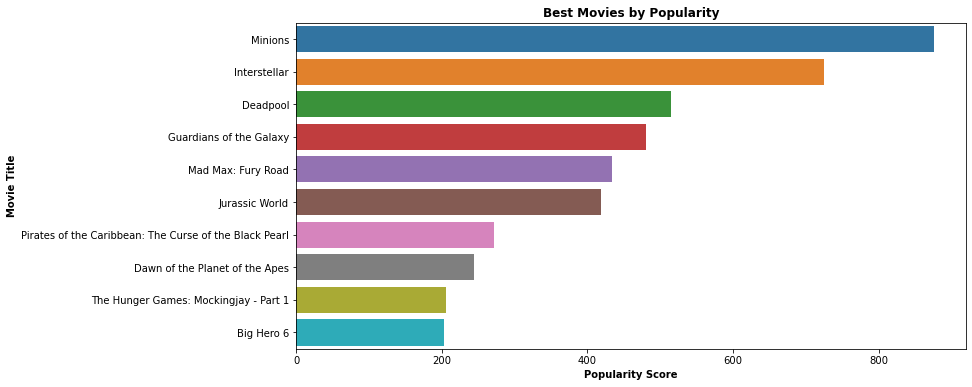

In [73]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x = popularity['popularity'].head(10), y=popularity['original_title'].head(10), data=popularity)
plt.title("Best Movies by Popularity", weight="bold")
plt.xlabel("Popularity Score", weight="bold")
plt.ylabel("Movie Title", weight="bold")
plt.show()

In [74]:
#Recommendations based on both Popularity Score and Weighted Avg(both 50% priority)

In [75]:
# Scaling down the Popularity Score and Weighted Average due to difference in magnitude
scaling = MinMaxScaler()
movie_scaled = scaling.fit_transform(movies[['weighted_avg', 'popularity']])
movie_normalized = pd.DataFrame(movie_scaled, columns=['weighted_avg', 'popularity'])
movie_normalized.head()

,weighted_avg,popularity
0,0.680483,0.171792
1,0.561355,0.158823
2,0.404842,0.122611
3,0.790355,0.128249
4,0.362051,0.050143


In [76]:
movies[['normalized_weighted_avg', 'normalized_popularity']] = movie_normalized
movies.head(20)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,movie_id,cast,crew,weighted_avg,normalized_weighted_avg,normalized_popularity
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.103391,0.680483,0.171792
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.753448,0.561355,0.158823
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.293688,0.404842,0.122611
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.426141,0.790355,0.128249
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.167989,0.362051,0.050143
5,258000000,"[Fantasy, Action, Adventure]",http://www.sonypictures.com/movies/spider-man3/,559,"[dual identity, amnesia, sandstorm, love of on...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,The battle within.,Spider-Man 3,5.9,3576,559,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de...",6.003531,0.306066,0.132117
6,260000000,"[Animation, Family]",http://disney.go.com/disneypictures/tangled/,38757,"[hostage, magic, horse, fairy tale, musical, p...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,They're taking adventure to new lengths.,Tangled,7.4,3330,38757,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de...",7.071012,0.669461,0.055574
7,280000000,"[Action, Adventure, Science Fiction]",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[marvel comic, sequel, superhero, based on com...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,A New Age Has Come.,Avengers: Age of Ul

In [77]:
movies['score'] = movies['normalized_weighted_avg'] * 0.5 + movies['normalized_popularity'] * 0.5
movies = movies.sort_values(['score'], ascending=False)
movies[['original_title','normalized_weighted_avg', 'normalized_popularity', 'score']].head(10)

,original_title,normalized_weighted_avg,normalized_popularity,score
76,G.I. Joe: The Rise of Cobra,0.949987,0.827158,0.888572
54,The Good Dinosaur,0.986455,0.213920,0.600187
101,X-Men: First Class,0.673257,0.495975,0.584616
77,Inside Out,0.963294,0.191375,0.577335
189,Noah,0.905617,0.157643,0.531630
71,The Mummy: Tomb of the Dragon Emperor,0.822568,0.232664,0.527616
917,Into the Woods,0.906099,0.135850,0.520975
778,Meet Dave,0.921685,0.119290,0.520488
975,괴물,0.871959,0.165998,0.518979
389,The Three Musketeers,0.846563,0.163345,0.504954


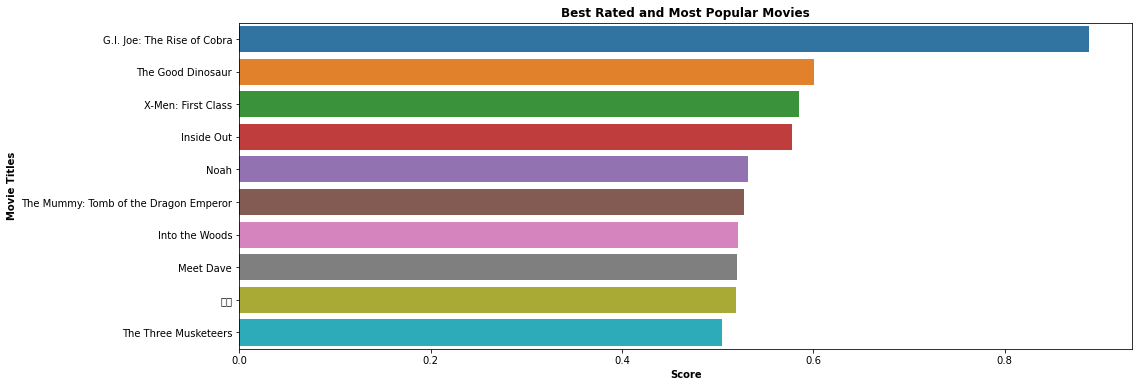

In [78]:
movies_score = movies.sort_values('score', ascending=False)

plt.figure(figsize=(16, 6))
ax = sns.barplot(x = movies_score['score'].head(10), y=movies_score['original_title'].head(10), data=movies_score)
plt.title("Best Rated and Most Popular Movies", weight="bold")
plt.xlabel("Score", weight="bold")
plt.ylabel("Movie Titles", weight="bold")
plt.show()

In [79]:
def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
            counter+=1
        else:
            break
    return L
#top 3 actors are retrived from cast

In [80]:
movies['cast'] = movies['cast'].apply(convert3)
movies.head()
#applying the helper function on cast and storing it back into the same column

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title,vote_average,vote_count,movie_id,cast,crew,weighted_avg,normalized_weighted_avg,normalized_popularity,score
76,175000000,"[Adventure, Action, Thriller, Science Fiction]",http://www.gijoemovie.com/,14869,"[terrorist, secret, hostage, technology, warhe...",en,G.I. Joe: The Rise of Cobra,From the Egyptian desert to deep below the pol...,32.852443,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,G.I. Joe: The Rise of Cobra,5.6,1962,14869,"[Dennis Quaid, Channing Tatum, Marlon Wayans]","[{""credit_id"": ""58e01bd39251415e5f00eacf"", ""de...",5.877148,0.949987,0.827158,0.888572
54,175000000,"[Adventure, Animation, Family]",http://movies.disney.com/the-good-dinosaur,105864,"[tyrannosaurus rex, friends, alternate history...",en,The Good Dinosaur,An epic journey into the world of dinosaurs wh...,51.692953,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,The Good Dinosaur,6.6,1736,105864,"[Raymond Ochoa, Jack Bright, Jeffrey Wright]","[{""credit_id"": ""52fe4a58c3a36847f81c8a07"", ""de...",6.455654,0.986455,0.213920,0.600187
101,160000000,"[Action, Science Fiction, Adventure]",http://www.x-menfirstclassmovie.com/,49538,"[cia, mutant, mine, marvel comic, superhero, b...",en,X-Men: First Class,Before Charles Xavier and Erik Lensherr took t...,3.195174,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,X-Men: First Class,7.1,5181,49538,"[James McAvoy, Michael Fassbender, Jennifer La...","[{""credit_id"": ""538d861cc3a368714300461d"", ""de...",6.926775,0.673257,0.495975,0.584616
77,175000000,"[Drama, Comedy, Animation, Family]",http://movies.disney.com/inside-out,150540,"[dream, cartoon, imaginary friend, animation, ...",en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",128.655964,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Inside Out,8.0,6560,150540,"[Amy Poehler, Phyllis Smith, Richard Kind]","[{""credit_id"": ""56098866c3a368681000003a"", ""de...",7.701110,0.963294,0.191375,0.577335
189,125000000,"[Drama, Adventure]",http://www.noahmovie.com,86834,"[bible, god, noah, 3d]",en,Noah,A man who suffers visions of an apocalyptic de...,46.115758,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,Noah,5.6,2350,86834,"[Russell Crowe, Jennifer Connelly, Emma Watson]","[{""credit_id"": ""53d8b3dec3a3682c43001c39"", ""de...",5.848265,0.905617,0.157643,0.531630


In [81]:
#movies['cast'] = movies['cast'].apply(lambda x:x[0:3])

In [82]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L
#our recommendation system takes only director role in crew into account

In [83]:
movies['crew'] = movies['crew'].apply(fetch_director)
movies.head()
#applying the helper function on crew and storing it back into the same column

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title,vote_average,vote_count,movie_id,cast,crew,weighted_avg,normalized_weighted_avg,normalized_popularity,score
76,175000000,"[Adventure, Action, Thriller, Science Fiction]",http://www.gijoemovie.com/,14869,"[terrorist, secret, hostage, technology, warhe...",en,G.I. Joe: The Rise of Cobra,From the Egyptian desert to deep below the pol...,32.852443,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,G.I. Joe: The Rise of Cobra,5.6,1962,14869,"[Dennis Quaid, Channing Tatum, Marlon Wayans]",[Stephen Sommers],5.877148,0.949987,0.827158,0.888572
54,175000000,"[Adventure, Animation, Family]",http://movies.disney.com/the-good-dinosaur,105864,"[tyrannosaurus rex, friends, alternate history...",en,The Good Dinosaur,An epic journey into the world of dinosaurs wh...,51.692953,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,The Good Dinosaur,6.6,1736,105864,"[Raymond Ochoa, Jack Bright, Jeffrey Wright]",[Peter Sohn],6.455654,0.986455,0.213920,0.600187
101,160000000,"[Action, Science Fiction, Adventure]",http://www.x-menfirstclassmovie.com/,49538,"[cia, mutant, mine, marvel comic, superhero, b...",en,X-Men: First Class,Before Charles Xavier and Erik Lensherr took t...,3.195174,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,X-Men: First Class,7.1,5181,49538,"[James McAvoy, Michael Fassbender, Jennifer La...",[Matthew Vaughn],6.926775,0.673257,0.495975,0.584616
77,175000000,"[Drama, Comedy, Animation, Family]",http://movies.disney.com/inside-out,150540,"[dream, cartoon, imaginary friend, animation, ...",en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",128.655964,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Inside Out,8.0,6560,150540,"[Amy Poehler, Phyllis Smith, Richard Kind]",[Pete Docter],7.701110,0.963294,0.191375,0.577335
189,125000000,"[Drama, Adventure]",http://www.noahmovie.com,86834,"[bible, god, noah, 3d]",en,Noah,A man who suffers visions of an apocalyptic de...,46.115758,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,Noah,5.6,2350,86834,"[Russell Crowe, Jennifer Connelly, Emma Watson]",[Darren Aronofsky],5.848265,0.905617,0.157643,0.531630


In [84]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())
movies.sample(5)
#converting the column overview into a list of values

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title,vote_average,vote_count,movie_id,cast,crew,weighted_avg,normalized_weighted_avg,normalized_popularity,score
4141,0,"[Horror, Comedy]",http://www.lesbianvampirekillersmovie.com/,18238,"[female nudity, horror, dark comedy, female ho...",en,Lesbian Vampire Killers,"[With, their, women, having, been, enslaved, b...",6.632891,"[{""name"": ""AV Pictures"", ""id"": 3471}]",...,Lesbian Vampire Killers,5.3,124,18238,"[James Corden, Mathew Horne, Paul McGann]",[Phil Claydon],6.192556,NaN,NaN,NaN
1730,28000000,"[Drama, Romance]",http://www.prideandprejudicemovie.net/splash.html,4348,"[bachelor, beautiful, prejudice, suitor, perio...",en,Pride & Prejudice,"[Pride, &, Prejudice, is, a, humorous, story, ...",36.583830,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,Pride & Prejudice,7.7,1358,4348,"[Keira Knightley, Matthew Macfadyen, Rosamund ...",[Joe Wright],6.982635,NaN,NaN,NaN
7,280000000,"[Action, Adventure, Science Fiction]",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[marvel comic, sequel, superhero, based on com...",en,Avengers: Age of Ultron,"[When, Tony, Stark, tries, to, jumpstart, a, d...",134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,Avengers: Age of Ultron,7.3,6767,99861,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[Joss Whedon],7.126789,0.688449,0.153337,0.420893
1514,30000000,"[Thriller, Drama, Mystery]",http://wwws.warnerbros.de/number23/,3594,"[suicide, based on novel, hotel room, obsessio...",en,The Number 23,"[Walter, Sparrow, is, an, animal, control, off...",23.197408,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...",...,The Number 23,6.3,1018,3594,"[Jim Carrey, Virginia Madsen, Logan Lerman]",[Joel Schumacher],6.284587,NaN,NaN,NaN
2398,20000000,[Comedy],http://www.areyousuperbad.com/,8363,"[becoming an adult, high school, young people,...",en,Superbad,"[High, school, best, buddies, are, facing, sep...",33.436092,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Superbad,7.0,2100,8363,"[Jonah Hill, Michael Cera, Christopher Mintz-P...",[Greg Mottola],6.712641,NaN,NaN,NaN


In [85]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1
#to properly traverse the entire phase

In [86]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)
#applying collapse to 4 columns

In [87]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title,vote_average,vote_count,movie_id,cast,crew,weighted_avg,normalized_weighted_avg,normalized_popularity,score
76,175000000,"[Adventure, Action, Thriller, ScienceFiction]",http://www.gijoemovie.com/,14869,"[terrorist, secret, hostage, technology, warhe...",en,G.I. Joe: The Rise of Cobra,"[From, the, Egyptian, desert, to, deep, below,...",32.852443,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,G.I. Joe: The Rise of Cobra,5.6,1962,14869,"[DennisQuaid, ChanningTatum, MarlonWayans]",[StephenSommers],5.877148,0.949987,0.827158,0.888572
54,175000000,"[Adventure, Animation, Family]",http://movies.disney.com/the-good-dinosaur,105864,"[tyrannosaurusrex, friends, alternatehistory, ...",en,The Good Dinosaur,"[An, epic, journey, into, the, world, of, dino...",51.692953,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,The Good Dinosaur,6.6,1736,105864,"[RaymondOchoa, JackBright, JeffreyWright]",[PeterSohn],6.455654,0.986455,0.213920,0.600187
101,160000000,"[Action, ScienceFiction, Adventure]",http://www.x-menfirstclassmovie.com/,49538,"[cia, mutant, mine, marvelcomic, superhero, ba...",en,X-Men: First Class,"[Before, Charles, Xavier, and, Erik, Lensherr,...",3.195174,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,X-Men: First Class,7.1,5181,49538,"[JamesMcAvoy, MichaelFassbender, JenniferLawre...",[MatthewVaughn],6.926775,0.673257,0.495975,0.584616
77,175000000,"[Drama, Comedy, Animation, Family]",http://movies.disney.com/inside-out,150540,"[dream, cartoon, imaginaryfriend, animation, f...",en,Inside Out,"[Growing, up, can, be, a, bumpy, road,, and, i...",128.655964,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Inside Out,8.0,6560,150540,"[AmyPoehler, PhyllisSmith, RichardKind]",[PeteDocter],7.701110,0.963294,0.191375,0.577335
189,125000000,"[Drama, Adventure]",http://www.noahmovie.com,86834,"[bible, god, noah, 3d]",en,Noah,"[A, man, who, suffers, visions, of, an, apocal...",46.115758,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,Noah,5.6,2350,86834,"[RussellCrowe, JenniferConnelly, EmmaWatson]",[DarrenAronofsky],5.848265,0.905617,0.157643,0.531630


In [88]:
movies['overview'][0]

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.']

In [89]:
#movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [90]:
movies['overview']

76      [From, the, Egyptian, desert, to, deep, below,...
54      [An, epic, journey, into, the, world, of, dino...
101     [Before, Charles, Xavier, and, Erik, Lensherr,...
77      [Growing, up, can, be, a, bumpy, road,, and, i...
189     [A, man, who, suffers, visions, of, an, apocal...
                              ...                        
4779    [Convenience, and, video, store, clerks, Dante...
4787    [Sasha, tries, to, get, her, soon-to-be, ex, h...
4797    [Recently, dumped, by, his, girlfirend, for, a...
4802    [Friends/fledgling, entrepreneurs, invent, a, ...
4807    [When, ambitious, New, York, attorney, Sam, is...
Name: overview, Length: 1494, dtype: object

In [91]:
#movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
#movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
#movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
#movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [92]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']
#combining the columns overview,genres,keywords ,cast and crew into tags
#bag of words technique

In [93]:
#new_df = movies.drop(columns=['overview','genres','keywords','cast','crew'])
#new.head(), dropping the combined columns to remove redundancy

In [94]:
new_df=movies[['movie_id','title','tags']]

In [95]:
new_df.head()

,movie_id,title,tags
76,14869,G.I. Joe: The Rise of Cobra,"[From, the, Egyptian, desert, to, deep, below,..."
54,105864,The Good Dinosaur,"[An, epic, journey, into, the, world, of, dino..."
101,49538,X-Men: First Class,"[Before, Charles, Xavier, and, Erik, Lensherr,..."
77,150540,Inside Out,"[Growing, up, can, be, a, bumpy, road,, and, i..."
189,86834,Noah,"[A, man, who, suffers, visions, of, an, apocal..."


In [96]:
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))
new_df.head()
#to create a stream of tags

,movie_id,title,tags
76,14869,G.I. Joe: The Rise of Cobra,From the Egyptian desert to deep below the pol...
54,105864,The Good Dinosaur,An epic journey into the world of dinosaurs wh...
101,49538,X-Men: First Class,Before Charles Xavier and Erik Lensherr took t...
77,150540,Inside Out,"Growing up can be a bumpy road, and it's no ex..."
189,86834,Noah,A man who suffers visions of an apocalyptic de...


In [97]:
import nltk

In [98]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [99]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)
#helper function to stem 

In [100]:
new_df['tags']=new_df['tags'].apply(stem)

In [101]:
new_df['tags'][0]
#first record all clubbed into one

'In the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

In [102]:
new_df['tags']=new_df['tags'].apply(lambda x:x.lower())
#converting the entire tags column into lowercase for uniformity
new_df.head()

,movie_id,title,tags
76,14869,G.I. Joe: The Rise of Cobra,from the egyptian desert to deep below the pol...
54,105864,The Good Dinosaur,an epic journey into the world of dinosaur whe...
101,49538,X-Men: First Class,befor charl xavier and erik lensherr took the ...
77,150540,Inside Out,"grow up can be a bumpi road, and it' no except..."
189,86834,Noah,a man who suffer vision of an apocalypt delug ...


In [103]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')
#as we cant deal directly with raw data and for computations we need numbers or vectors
#common stop words in english are eliminated(not considered as they don't contribute to the meaning of the sentence)
#taking into consideration all 5000 rows(nearly) frequency of each word in calculated

In [104]:
vector = cv.fit_transform(new_df['tags']).toarray()
#training the model using fit_transorm (column-tags)

In [105]:
vector.shape
#4806-number of movies,5000-no of ocuurrence of most common words(dimensions)
#now every movie is a vector in 5000d space

(1494, 5000)

In [106]:
vector[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [107]:
cv.get_feature_names()
#displays most frequently occuring words

['00',
 '000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '14',
 '15',
 '16',
 '17',
 '18th',
 '19',
 '1930',
 '1945',
 '1950',
 '1950s',
 '1955',
 '1960',
 '1970',
 '1979',
 '1980',
 '1985',
 '1987',
 '1988',
 '1990',
 '1995',
 '1997',
 '1999',
 '19th',
 '19thcenturi',
 '20',
 '2003',
 '2008',
 '2009',
 '2016',
 '2019',
 '20th',
 '21stcenturi',
 '24',
 '25',
 '30',
 '300',
 '3d',
 '40',
 '50',
 '500',
 '51',
 '60',
 '60s',
 '70',
 'aaron',
 'aaroneckhart',
 'aaronseltz',
 'aarontaylor',
 'aba',
 'abandon',
 'abbiecornish',
 'abduct',
 'abigail',
 'abigailbreslin',
 'abil',
 'abl',
 'aboard',
 'abov',
 'absent',
 'absolut',
 'absurd',
 'abus',
 'academi',
 'accept',
 'access',
 'accid',
 'accident',
 'accompani',
 'accomplish',
 'account',
 'accus',
 'achiev',
 'act',
 'action',
 'activ',
 'activist',
 'actor',
 'actress',
 'actual',
 'adam',
 'adammckay',
 'adamsandl',
 'adamscott',
 'adamshankman',
 'adapt',
 'addict',
 'adjust',
 'admir',
 'adolesc',
 'adopt',
 'ador',
 'adrian',
 'adrie

In [108]:
from sklearn.metrics.pairwise import cosine_similarity
#similarity is inverse of distance

In [109]:
similarity = cosine_similarity(vector)
#euclidean distance is not a reliable measure in higher dimensions
#calculates cosine angle between each and every pair of vectors

In [110]:
similarity

array([[1.        , 0.05572782, 0.1165631 , ..., 0.        , 0.04662524,
        0.        ],
       [0.05572782, 1.        , 0.05976143, ..., 0.        , 0.        ,
        0.        ],
       [0.1165631 , 0.05976143, 1.        , ..., 0.03100868, 0.1       ,
        0.02192645],
       ...,
       [0.        , 0.        , 0.03100868, ..., 1.        , 0.        ,
        0.1903749 ],
       [0.04662524, 0.        , 0.1       , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.02192645, ..., 0.1903749 , 0.        ,
        1.        ]])

In [111]:
similarity.shape
#each similarity pair(4806*4806)

(1494, 1494)

In [112]:
similarity[0]
#similarity form 1st movie to each and every movie

array([1.        , 0.05572782, 0.1165631 , ..., 0.        , 0.04662524,
       0.        ])

In [113]:
new_df[new_df['title'] == 'Batman Begins'].index[0]
#extracting index of a particular movie by title

119

In [114]:
def recommend(movie):
    movie_index = new_df[new_df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[movie_index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new_df.iloc[i[0]].title)
#first the index of the movie is extracted
#similarity in descending order is enumerated along with the index and is sorted on the basis of sililarity
#first 5 movies title is displayed

In [115]:
recommend('Avatar')

G-Force
Collateral Damage
The Expendables 2
Mission: Impossible III
Monsters vs Aliens


In [116]:
import pickle

In [117]:
pickle.dump(new_df,open('movie_list.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))

In [118]:
#Collaborative Filtering(User-user filtering coz recommendation is based on similar other users)

In [119]:
#Pearson correlation function-it is invariant for scaling

In [120]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [121]:
#reading datasets
movies = pd.read_csv('E:/Sem 5 notes and lab/DA Assignment/dataset/movies.csv')
ratings = pd.read_csv('E:/Sem 5 notes and lab/DA Assignment/dataset/ratings.csv')

In [122]:
#displaying first 5 values in movies dataset
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [123]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [124]:
movies['year'] = movies.title.str.extract('(\(\d\d\d\d\))',expand=False)
movies['year']
#making a seperate column for year by extracting it from the title for flexibility in further analysis
#expand=true =>return dataframe,expand=false =>return series/index/dataframe

0       (1995)
1       (1995)
2       (1995)
3       (1995)
4       (1995)
         ...  
9737    (2017)
9738    (2017)
9739    (2017)
9740    (2018)
9741    (1991)
Name: year, Length: 9742, dtype: object

In [125]:
#Removing paranthesis from the seperated column 'year'
movies['year'] = movies.year.str.extract('(\d\d\d\d)',expand=False)
movies['year']

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
9737    2017
9738    2017
9739    2017
9740    2018
9741    1991
Name: year, Length: 9742, dtype: object

In [126]:
movies['title']
#year is not yet removed from title

0                                Toy Story (1995)
1                                  Jumanji (1995)
2                         Grumpier Old Men (1995)
3                        Waiting to Exhale (1995)
4              Father of the Bride Part II (1995)
                          ...                    
9737    Black Butler: Book of the Atlantic (2017)
9738                 No Game No Life: Zero (2017)
9739                                 Flint (2017)
9740          Bungo Stray Dogs: Dead Apple (2018)
9741          Andrew Dice Clay: Dice Rules (1991)
Name: title, Length: 9742, dtype: object

In [127]:
#Removing  year from  'title' column
movies['title'] = movies.title.str.replace('(\(\d\d\d\d\))', '')
movies['title']

0                                Toy Story 
1                                  Jumanji 
2                         Grumpier Old Men 
3                        Waiting to Exhale 
4              Father of the Bride Part II 
                       ...                 
9737    Black Butler: Book of the Atlantic 
9738                 No Game No Life: Zero 
9739                                 Flint 
9740          Bungo Stray Dogs: Dead Apple 
9741          Andrew Dice Clay: Dice Rules 
Name: title, Length: 9742, dtype: object

In [128]:
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies['title'] = movies['title'].apply(lambda x: x.strip())

In [129]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [130]:
movies = movies.drop('genres', 1)
movies.head()
#dropping the column genre as we aren't making recommendations on the basis of a particular genre

,movieId,title,year
0,1,Toy Story,1995
1,2,Jumanji,1995
2,3,Grumpier Old Men,1995
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995


In [131]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [132]:
ratings = ratings.drop('timestamp', 1)
ratings.head()
#dropping timestamp column as it isn't required to make recommendations

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [133]:
userInput = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':3.5},
            {'title':'Jumanji', 'rating':2},
            {'title':"Pulp Fiction", 'rating':5},
            {'title':'Akira', 'rating':4.5}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies
#an example user is created with title of the movies along with their ratings, the input is converted into a dataframe

,title,rating
0,"Breakfast Club, The",5.0
1,Toy Story,3.5
2,Jumanji,2.0
3,Pulp Fiction,5.0
4,Akira,4.5


In [134]:
#Filtering out the movies by title
inputId = movies[movies['title'].isin(inputMovies['title'].tolist())]

#Then merging it so we can get the movieId. It's implicitly merging it by title.
inputMovies = pd.merge(inputId, inputMovies)

#Dropping information we won't use from the input dataframe
inputMovies = inputMovies.drop('year', 1)

inputMovies

,movieId,title,rating
0,1,Toy Story,3.5
1,2,Jumanji,2.0
2,296,Pulp Fiction,5.0
3,1274,Akira,4.5
4,1968,"Breakfast Club, The",5.0


In [135]:
#Recommender System using K Nearest Neighbors based Collaborative Filtering (Movielens Dataset)

In [136]:
df = pd.merge(movies, ratings, on="movieId")
df.head()

,movieId,title,year,userId,rating
0,1,Toy Story,1995,1,4.0
1,1,Toy Story,1995,5,4.0
2,1,Toy Story,1995,7,4.5
3,1,Toy Story,1995,15,2.5
4,1,Toy Story,1995,17,4.5


In [137]:
# Count Ratings for each and every movie
ratings = df.dropna(axis=0, subset = ['title'])    # Drop all 'NaN' values
movie_rating_Count = (ratings.groupby(by=['title'])['rating'].count().reset_index().
                     rename(columns = {'rating':'TotalRatingCount'})[['title', 'TotalRatingCount']])

movie_rating_Count.head(10)

,title,TotalRatingCount
0,'71,1
1,'Hellboy': The Seeds of Creation,1
2,'Round Midnight,2
3,'Salem's Lot,1
4,'Til There Was You,2
5,'Tis the Season for Love,1
6,"'burbs, The",17
7,'night Mother,1
8,(500) Days of Summer,42
9,*batteries not included,7


In [138]:
movie_rating_Count.describe()

,TotalRatingCount
count,9446.000000
mean,10.674995
std,22.814116
min,1.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,329.000000


In [139]:
# Merging the rating counts with the ratings
ratings = ratings.merge(movie_rating_Count, left_on='title', right_on='title', how='left')
# left_on => on left dataframe which column considered, right_on => on right dataframe which column considered
ratings.head()

,movieId,title,year,userId,rating,TotalRatingCount
0,1,Toy Story,1995,1,4.0,215
1,1,Toy Story,1995,5,4.0,215
2,1,Toy Story,1995,7,4.5,215
3,1,Toy Story,1995,15,2.5,215
4,1,Toy Story,1995,17,4.5,215


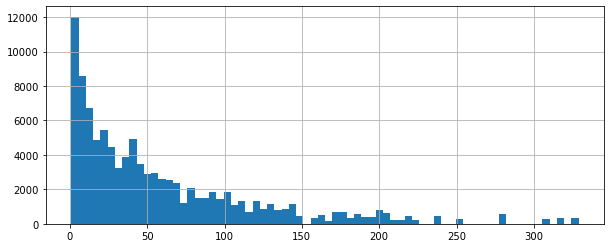

In [140]:
plt.figure(figsize=(10,4))
ratings['TotalRatingCount'].hist(bins=70)

In [141]:
popularity_threshold = 100
rating_popular_movie = ratings.query('TotalRatingCount >= @popularity_threshold')
rating_popular_movie.head()

,movieId,title,year,userId,rating,TotalRatingCount
0,1,Toy Story,1995,1,4.0,215
1,1,Toy Story,1995,5,4.0,215
2,1,Toy Story,1995,7,4.5,215
3,1,Toy Story,1995,15,2.5,215
4,1,Toy Story,1995,17,4.5,215


In [142]:
rating_popular_movie.shape

(20327, 6)

In [143]:
s = set(rating_popular_movie['title'])
s

{'2001: A Space Odyssey',
 'Ace Ventura: Pet Detective',
 'Aladdin',
 'Alien',
 'Aliens',
 "Amelie (Fabuleux destin d'Amélie Poulain, Le)",
 'American Beauty',
 'American History X',
 'American Pie',
 'Apocalypse Now',
 'Apollo 13',
 'Austin Powers: International Man of Mystery',
 'Austin Powers: The Spy Who Shagged Me',
 'Babe',
 'Back to the Future',
 'Batman',
 'Batman Begins',
 'Batman Forever',
 'Beautiful Mind, A',
 'Beauty and the Beast',
 'Big Lebowski, The',
 'Blade Runner',
 'Bourne Identity, The',
 'Braveheart',
 'Breakfast Club, The',
 'Casablanca',
 'Cast Away',
 'Catch Me If You Can',
 'Clear and Present Danger',
 'Clerks',
 'Cliffhanger',
 'Clockwork Orange, A',
 'Clueless',
 'Crimson Tide',
 'Crouching Tiger, Hidden Dragon (Wo hu cang long)',
 'Dances with Wolves',
 'Dark Knight, The',
 'Departed, The',
 'Die Hard',
 'Die Hard: With a Vengeance',
 'Donnie Darko',
 'Dumb & Dumber (Dumb and Dumber)',
 'E.T. the Extra-Terrestrial',
 'Eternal Sunshine of the Spotless Mind',

In [144]:
# Create a Pivot Table
features = rating_popular_movie.pivot_table(index='title', columns='userId', values='rating').fillna(0)
features.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
2001: A Space Odyssey,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,5.0,0.0,3.0,0.0,4.5
Ace Ventura: Pet Detective,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,2.0,0.0,0.0,0.0,3.5,0.0,3.0
Aladdin,0.0,0.0,0.0,4.0,4.0,5.0,3.0,0.0,0.0,4.0,...,0.0,0.0,0.0,3.0,3.5,0.0,0.0,3.0,0.0,0.0
Alien,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,4.0,3.0,4.0,0.0,4.5
Aliens,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,3.5,0.0,4.5,0.0,5.0


In [145]:
# Convert the pivot_table into an array matrix
from scipy.sparse import csr_matrix
features_matrix = csr_matrix(features.values)    # All info of pivot table converted into an array
features_matrix

<139x597 sparse matrix of type '<class 'numpy.float64'>'
	with 20277 stored elements in Compressed Sparse Row format>

In [146]:
'''Using Cosine Similarity
similarity(A, B) = cos(theta) = (A.B) / (||A|| * ||B||) => [Dot Product of the vectors/Product of magnitudes of vector]
theta = angle between the two vectors A and B
Cos(0) => similarity = 1
Cos(90) => similarity = 0
Cos(45) => similarity = 0.5'''

'Using Cosine Similarity\nsimilarity(A, B) = cos(theta) = (A.B) / (||A|| * ||B||) => [Dot Product of the vectors/Product of magnitudes of vector]\ntheta = angle between the two vectors A and B\nCos(0) => similarity = 1\nCos(90) => similarity = 0\nCos(45) => similarity = 0.5'

In [147]:
#We will use KNN along with cosine similarity as KNN works on the concept of Euclidean Distance

In [148]:
from sklearn.neighbors import NearestNeighbors   # Not KNearestNeighbors, NearestNeighbors => Unsupervised Algo
model = NearestNeighbors(metric = "cosine", algorithm="brute")
model.fit(features_matrix)    # p=2 => Euclidean Distance Parameter

NearestNeighbors(algorithm='brute', metric='cosine')

In [149]:
features.shape

(139, 597)

In [150]:
# Taking a new movie at random
query_index = np.random.choice(features.shape[0])    # Collect 1 record
print(query_index)

88


In [151]:
# Find similar movies(nearer to the selected movie) using kneighbors
distances, indices = model.kneighbors(features.iloc[query_index,:].values.reshape(1, -1), n_neighbors=6)
# n_neighbors = 6 => will include the movie itself => We will be getting 5 other movie recommendations

In [152]:
# distances = 0 => Same movie itself
distances

array([[1.44328993e-15, 3.22645869e-01, 4.07723472e-01, 4.11425613e-01,
        4.34831626e-01, 4.49347225e-01]])

In [153]:
indices

array([[ 88,  70,  75, 131, 103,  59]], dtype=int64)

In [154]:
# Print top 5 movie name recommendations for movie along with the distances from original movie
for i in range(0, len(distances.flatten())):     # Convert 'distances' array into 1-D array
    if(i==0):
        print("Recommendations for {0}:\n".format(features.index[query_index]))    # 1st recommendation => same movie itself
    else:
        print("{0}: {1}, with distance of {2}:".format(i, features.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Mission: Impossible:

1: Independence Day (a.k.a. ID4), with distance of 0.3226458687463576:
2: Jurassic Park, with distance of 0.4077234724499553:
3: Twister, with distance of 0.4114256131504752:
4: Rock, The, with distance of 0.4348316264341322:
5: GoldenEye, with distance of 0.44934722489761203:


In [155]:
#Filtering out users that have watched movies that the input user has watched and storing it
userSubset = ratings[ratings['movieId'].isin(inputMovies['movieId'].tolist())]
userSubset.head()

,movieId,title,year,userId,rating,TotalRatingCount
0,1,Toy Story,1995,1,4.0,215
1,1,Toy Story,1995,5,4.0,215
2,1,Toy Story,1995,7,4.5,215
3,1,Toy Story,1995,15,2.5,215
4,1,Toy Story,1995,17,4.5,215


In [156]:
#Groupby creates several sub dataframes where they all have the same value in the column specified as the parameter
userSubsetGroup = userSubset.groupby(['userId'])

In [157]:
userSubsetGroup.get_group(4)
#retrives only that specific group

,movieId,title,year,userId,rating,TotalRatingCount
7861,296,Pulp Fiction,1994,4,1.0,307
37375,1968,"Breakfast Club, The",1985,4,4.0,113


In [158]:
#user with id 1130 having all 5 similar movies watched
len(userSubsetGroup.get_group(1))

2

In [159]:
userSubsetGroup.get_group(110)

,movieId,title,year,userId,rating,TotalRatingCount
7915,296,Pulp Fiction,1994,110,4.5,307


In [160]:
#user with id 110 having only 1 similar movie watched
len(userSubsetGroup.get_group(110))

1

In [161]:
#Sorting it so users with movie most in common with the input will have priority
userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)

In [162]:
#Top most user with id 75 having all 5 similar moves watched
userSubsetGroup

[(91,
         movieId                title  year  userId  rating  TotalRatingCount
  32           1            Toy Story  1995      91     4.0               215
  226          2              Jumanji  1995      91     3.0               110
  7905       296         Pulp Fiction  1994      91     4.5               307
  28816     1274                Akira  1988      91     5.0                39
  37388     1968  Breakfast Club, The  1985      91     3.0               113),
 (177,
         movieId                title  year  userId  rating  TotalRatingCount
  62           1            Toy Story  1995     177     5.0               215
  243          2              Jumanji  1995     177     3.5               110
  7953       296         Pulp Fiction  1994     177     5.0               307
  28820     1274                Akira  1988     177     2.0                39
  37402     1968  Breakfast Club, The  1985     177     3.5               113),
 (219,
         movieId                title  y

In [163]:
#Top most user with id 91 having all 5 similar moves watched
userSubsetGroup[0]

(91,
        movieId                title  year  userId  rating  TotalRatingCount
 32           1            Toy Story  1995      91     4.0               215
 226          2              Jumanji  1995      91     3.0               110
 7905       296         Pulp Fiction  1994      91     4.5               307
 28816     1274                Akira  1988      91     5.0                39
 37388     1968  Breakfast Club, The  1985      91     3.0               113)

In [164]:
#Id of top user group
userSubsetGroup[0][0]

91

In [165]:
#dataframe of top user group
userSubsetGroup[0][1]

,movieId,title,year,userId,rating,TotalRatingCount
32,1,Toy Story,1995,91,4.0,215
226,2,Jumanji,1995,91,3.0,110
7905,296,Pulp Fiction,1994,91,4.5,307
28816,1274,Akira,1988,91,5.0,39
37388,1968,"Breakfast Club, The",1985,91,3.0,113


In [166]:
userSubsetGroup = userSubsetGroup[0:100]
#extracting top 100 groups

In [167]:
#Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
pearsonCorrelationDict = {}

#For every user group in our subset
for name, group in userSubsetGroup:
    group=group.sort_values(by='movieId')
    inputMovies=inputMovies.sort_values(by='movieId')
    nRatings=len(group)
    
    #Let's start by sorting the input and current 
    #Get the review scores for the movies that they both have in common
    temp_df = inputMovies[inputMovies['movieId'].isin(group['movieId'].tolist())]
    
    ###For Debugging Purpose
    #if nRatings<5:
    #    print(inputMovies['movieId'].isin(group['movieId'].tolist()))
    #    break
    #else:
    #    continue
    
    #And then store them in a temporary buffer variable in a list format to facilitate future calculations
    tempRatingList = temp_df['rating'].tolist()
    
    #Let's also put the current user group reviews in a list format
    tempGroupList = group['rating'].tolist()
    
    #Now let's calculate the pearson correlation between two users, so called, x and y

    #For package based
    #scipy.stats import pearsonr
    #pearsonr(tempRatingList,tempGroupList)[0]

    #For hard code based
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(nRatings)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(nRatings)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(nRatings)
    
    #If the denominator is different than zero, then divide, else, 0 correlation.
    if Sxx != 0 and Syy != 0:
        pearsonCorrelationDict[name] = Sxy/np.sqrt(Sxx*Syy)
    else:
        pearsonCorrelationDict[name] = 0
    #?

In [168]:
pearsonCorrelationDict.items()
#dictionary which contains the pearson's correlation netween input user and all the other users

dict_items([(91, 0.43852900965351443), (177, 0.0), (219, 0.45124262819713973), (274, 0.716114874039432), (298, 0.9592712306918567), (414, 0.9376144618769914), (474, 0.11720180773462392), (477, 0.4385290096535153), (480, 0.7844645405527362), (483, 0.08006407690254357), (599, 0.7666866491579839), (608, 0.920736884379251), (50, 0.15713484026367722), (57, -0.7385489458759964), (68, 0.0), (103, 0.5222329678670935), (135, 0.8703882797784892), (182, 0.9428090415820635), (202, 0.5222329678670935), (217, 0.30151134457776363), (226, 0.9438798074485389), (288, 0.6005325641789633), (307, 0.9655810287305759), (318, 0.44486512077567225), (322, 0.5057805388588731), (330, 0.9035942578600878), (357, 0.5606119105813882), (434, 0.9864036607532465), (448, 0.30151134457776363), (469, 0.8164965809277261), (561, 0.5222329678670935), (600, 0.18442777839082938), (606, 0.9146591207600472), (610, -0.47140452079103173), (18, 1.0), (19, -0.5), (21, 0), (45, 0.5000000000000009), (63, -0.4999999999999982), (64, 0.0)

In [169]:
pearsonDF = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index')
pearsonDF.head()
#convert the above dictionary into a dataframe and orient it on the basis of index

,0
91,0.438529
177,0.000000
219,0.451243
274,0.716115
298,0.959271


In [170]:
pearsonDF.columns = ['similarityIndex']
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()
#giving column names and formatting the correlation dataframe

,similarityIndex,userId
0,0.438529,91
1,0.000000,177
2,0.451243,219
3,0.716115,274
4,0.959271,298


In [171]:
topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[0:50]
topUsers.head()
#sort values in descending order based on similarity index and display top 5
#0:50-?

,similarityIndex,userId
43,1.0,132
34,1.0,18
63,1.0,305
82,1.0,489
86,1.0,525


In [172]:
topUsersRating = topUsers.merge(ratings, left_on='userId', right_on='userId', how='inner')
topUsersRating.head()
#merging user similarity index with their ratings

,similarityIndex,userId,movieId,title,year,rating,TotalRatingCount
0,1.0,132,1,Toy Story,1995,2.0,215
1,1.0,132,17,Sense and Sensibility,1995,3.0,67
2,1.0,132,29,"City of Lost Children, The (Cité des enfants p...",1995,2.0,38
3,1.0,132,32,Twelve Monkeys (a.k.a. 12 Monkeys),1995,3.0,177
4,1.0,132,34,Babe,1995,1.5,128


In [173]:
#Multiplies the similarity by the user's ratings
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head()

,similarityIndex,userId,movieId,title,year,rating,TotalRatingCount,weightedRating
0,1.0,132,1,Toy Story,1995,2.0,215,2.0
1,1.0,132,17,Sense and Sensibility,1995,3.0,67,3.0
2,1.0,132,29,"City of Lost Children, The (Cité des enfants p...",1995,2.0,38,2.0
3,1.0,132,32,Twelve Monkeys (a.k.a. 12 Monkeys),1995,3.0,177,3.0
4,1.0,132,34,Babe,1995,1.5,128,1.5


In [174]:
#Applies a sum to the topUsers after grouping it up by userId
tempTopUsersRating = topUsersRating.groupby('movieId').sum()[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()

,sum_similarityIndex,sum_weightedRating
movieId,,
1,36.354096,133.167946
2,31.005292,94.904257
3,8.783859,26.381456
4,0.866025,1.732051
5,7.165336,19.775255


In [175]:
#Creates an empty dataframe
recommendation_df = pd.DataFrame()
#Now we take the weighted average
recommendation_df['weighted average recommendation score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_df['movieId'] = tempTopUsersRating.index
recommendation_df.head()

,weighted average recommendation score,movieId
movieId,,
1,3.663080,1
2,3.060905,2
3,3.003402,3
4,2.000000,4
5,2.759850,5


In [176]:
recommendation_df = recommendation_df.sort_values(by='weighted average recommendation score', ascending=False)
recommendation_df.head()
#sort based om weighted average recommendation score in descending order

,weighted average recommendation score,movieId
movieId,,
3310,5.0,3310
7579,5.0,7579
905,5.0,905
1211,5.0,1211
140627,5.0,140627


In [177]:
movies.loc[movies['movieId'].isin(recommendation_df.head(20)['movieId'].tolist())]
#loc attribute access a group of rows and columns by labels or a given boolean array in dataframe

,movieId,title,year
536,633,Denise Calls Up,1995
687,905,It Happened One Night,1934
799,1046,Beautiful Thing,1996
912,1211,"Wings of Desire (Himmel über Berlin, Der)",1987
2474,3296,To Sir with Love,1967
2484,3310,"Kid, The",1921
2851,3813,Interiors,1978
3189,4298,Rififi (Du rififi chez les hommes),1955
3905,5485,Tadpole,2002
3936,5537,Satin Rouge,2002


In [178]:
#Collaboartive Filtering with Pearson Coefficient(using scipy)

In [179]:
import pandas as pd
from scipy import sparse

In [180]:
#reading datasets
movies = pd.read_csv('E:/Sem 5 notes and lab/DA Assignment/dataset/movies.csv')
ratings = pd.read_csv('E:/Sem 5 notes and lab/DA Assignment/dataset/ratings.csv')
ratings = pd.merge(movies,ratings).drop(['genres','timestamp'],axis=1)
#dropping unwanted columns and merging the datasets required
print(ratings.shape)
ratings.head()

(100836, 4)


,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


In [181]:
userRatings = ratings.pivot_table(index=['userId'],columns=['title'],values='rating')
#pivot method in pandas is used to extract required data based on rows,columns and values
userRatings.head()
#returns ratings of each user for each movie title
#there would be so many NaN values as it isnt legit for a user to rate all movies

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
print("Before: ",userRatings.shape)
userRatings = userRatings.dropna(thresh=10, axis=1).fillna(0,axis=1)
#drop columns i.e., axis=1 which has less than 10 users ratings and fill the rest of the NaN's  with 0 
#userRatings.fillna(0, inplace=True)
print("After: ",userRatings.shape)

Before:  (610, 9719)
After:  (610, 2269)


In [183]:
userRatings.head()

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [184]:
corrMatrix = userRatings.corr(method='pearson')
corrMatrix.head(100)
#built-in

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,0.063117,-0.023768,0.143482,0.011998,0.087931,0.224052,0.034223,0.009277,0.008331,...,0.017477,0.032470,0.134701,0.153158,0.101301,0.049897,0.003233,0.187953,0.062174,0.353194
(500) Days of Summer (2009),0.063117,1.000000,0.142471,0.273989,0.193960,0.148903,0.142141,0.159756,0.135486,0.200135,...,0.374515,0.178655,0.068407,0.414585,0.355723,0.252226,0.216007,0.053614,0.241092,0.125905
10 Cloverfield Lane (2016),-0.023768,0.142471,1.000000,-0.005799,0.112396,0.006139,-0.016835,0.031704,-0.024275,0.272943,...,0.242663,0.099059,-0.023477,0.272347,0.241751,0.195054,0.319371,0.177846,0.096638,0.002733
10 Things I Hate About You (1999),0.143482,0.273989,-0.005799,1.000000,0.244670,0.223481,0.211473,0.011784,0.091964,0.043383,...,0.243118,0.104858,0.132460,0.091853,0.158637,0.281934,0.050031,0.121029,0.130813,0.110612
"10,000 BC (2008)",0.011998,0.193960,0.112396,0.244670,1.000000,0.234459,0.119132,0.059187,-0.025882,0.089328,...,0.260261,0.087592,0.094913,0.184521,0.242299,0.240231,0.094773,0.088045,0.203002,0.083518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Almost Famous (2000),0.099554,0.209549,0.032088,0.296727,0.134434,0.118628,0.242958,0.079158,0.005092,0.051279,...,0.244619,0.085395,0.072505,0.221259,0.126008,0.362571,0.011577,0.208008,0.186599,0.147413
Along Came Polly (2004),0.027287,0.282426,0.113213,0.193085,0.162678,0.180259,0.112928,0.121704,0.125792,0.124032,...,0.173133,0.160430,0.029076,0.189165,0.166278,0.309183,0.078468,-0.036498,0.231566,0.025928
Along Came a Spider (2001),0.064762,-0.003205,0.016372,0.085365,-0.018241,0.080388,0.094016,-0.016678,0.079375,-0.028052,...,0.115347,0.093774,0.085286,0.150757,0.052144,0.174489,0.014189,0.025327,0.233244,0.043581


In [185]:
def get_similar(movie_name,rating):
    similar_ratings = corrMatrix[movie_name]*(rating-2.5)
    similar_ratings = similar_ratings.sort_values(ascending=False)
    #print(type(similar_ratings))
    return similar_ratings
#function which calculates similar ratings for a given rating based on the movie_name as index and sorts them in descending order

In [186]:
romantic_lover = [("(500) Days of Summer (2009)",5),("Alice in Wonderland (2010)",3),("Aliens (1986)",1),("2001: A Space Odyssey (1968)",2)]
similar_movies = pd.DataFrame()
#input converted into a dataframe
for movie,rating in romantic_lover:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)
    #for each movie in the input get similar movies and append them into a list

similar_movies.head(10)

,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
0,0.157792,2.500000,0.356179,0.684973,0.484900,0.372257,0.355353,0.399389,0.338715,0.500338,...,0.936288,0.446637,0.171018,1.036463,0.889309,0.630565,0.540017,0.134034,0.602730,0.314763
1,-0.016276,0.203998,0.126834,0.113241,0.092218,0.085790,0.072825,0.097794,0.083822,0.084897,...,0.159907,0.085502,0.011564,0.176888,0.168302,0.121710,0.072590,0.025695,0.081764,0.027540
2,-0.304722,-0.062634,-0.214700,-0.118754,-0.037059,-0.063992,-0.170195,-0.280090,-0.016283,-0.102493,...,-0.147339,-0.162387,-0.368712,-0.281119,-0.263686,-0.228562,-0.144292,-0.410899,-0.242935,-0.238410
3,-0.102988,-0.056808,-0.049655,-0.042987,-0.021729,-0.055422,-0.051115,-0.097954,-0.061595,-0.070398,...,-0.075325,-0.048607,-0.128795,-0.175166,-0.098088,-0.074205,-0.049626,-0.153017,-0.082048,-0.091432


In [187]:
similar_movies.sum().sort_values(ascending=False).head(20)
#sum of corr of each movie taken and is sorted in descending order 

(500) Days of Summer (2009)                      2.584556
Alice in Wonderland (2010)                       1.395229
Silver Linings Playbook (2012)                   1.254800
Yes Man (2008)                                   1.116264
Adventureland (2009)                             1.112235
Marley & Me (2008)                               1.108381
About Time (2013)                                1.102192
Crazy, Stupid, Love. (2011)                      1.088757
50/50 (2011)                                     1.086517
Help, The (2011)                                 1.075963
Up in the Air (2009)                             1.053037
Holiday, The (2006)                              1.034470
Friends with Benefits (2011)                     1.030875
Notebook, The (2004)                             1.025880
Easy A (2010)                                    1.015771
Secret Life of Walter Mitty, The (2013)          0.997979
Perks of Being a Wallflower, The (2012)          0.967425
Toy Story 3 (2

In [188]:
action_lover = [("Amazing Spider-Man, The (2012)",5),("Mission: Impossible III (2006)",4),("Toy Story 3 (2010)",2),("2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",4)]
similar_movies = pd.DataFrame()
for movie,rating in action_lover:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head(10)
similar_movies.sum().sort_values(ascending=False).head(20)
#example

Amazing Spider-Man, The (2012)                           3.233134
Mission: Impossible III (2006)                           2.874798
2 Fast 2 Furious (Fast and the Furious 2, The) (2003)    2.701477
Over the Hedge (2006)                                    2.229721
Crank (2006)                                             2.176259
Mission: Impossible - Ghost Protocol (2011)              2.159666
Hancock (2008)                                           2.156098
The Amazing Spider-Man 2 (2014)                          2.153677
Hellboy (2004)                                           2.137518
Snakes on a Plane (2006)                                 2.137396
Jumper (2008)                                            2.129716
Chronicles of Riddick, The (2004)                        2.121689
Tron: Legacy (2010)                                      2.111843
Fantastic Four (2005)                                    2.083022
X-Men: The Last Stand (2006)                             2.077530
Wreck-It R

In [189]:
#Collaborative Filtering with Cosine Similarity

In [190]:
import pandas as pd
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
movies = pd.read_csv('E:/Sem 5 notes and lab/DA Assignment/dataset/movies.csv')
ratings = pd.read_csv('E:/Sem 5 notes and lab/DA Assignment/dataset/ratings.csv')
ratings = pd.merge(movies,ratings).drop(['genres','timestamp'],axis=1)
print(ratings.shape)
ratings.head()

(100836, 4)


,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


In [191]:
ratings.fillna(0, inplace=True)
ratings
#replacing all nan with 0's

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5
...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),184,4.0
100832,193583,No Game No Life: Zero (2017),184,3.5
100833,193585,Flint (2017),184,3.5
100834,193587,Bungo Stray Dogs: Dead Apple (2018),184,3.5


In [192]:
#not yet completed

In [193]:
#Content based Filtering using dot product (user-user)

In [194]:
#reading datasets
movies = pd.read_csv('E:/Sem 5 notes and lab/DA Assignment/dataset/movies.csv')
ratings = pd.read_csv('E:/Sem 5 notes and lab/DA Assignment/dataset/ratings.csv')
#reading the datasets for analysis

In [195]:
movies.head()
#displays 5 top values from movies dataset

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [196]:
movies['year'] = movies.title.str.extract('(\(\d\d\d\d\))',expand=False)
movies['year']
#extracting year from title into a seperate column

0       (1995)
1       (1995)
2       (1995)
3       (1995)
4       (1995)
         ...  
9737    (2017)
9738    (2017)
9739    (2017)
9740    (2018)
9741    (1991)
Name: year, Length: 9742, dtype: object

In [197]:
#Removing paranthesis
movies['year'] = movies.year.str.extract('(\d\d\d\d)',expand=False)
movies['year']

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
9737    2017
9738    2017
9739    2017
9740    2018
9741    1991
Name: year, Length: 9742, dtype: object

In [198]:
movies['title']

0                                Toy Story (1995)
1                                  Jumanji (1995)
2                         Grumpier Old Men (1995)
3                        Waiting to Exhale (1995)
4              Father of the Bride Part II (1995)
                          ...                    
9737    Black Butler: Book of the Atlantic (2017)
9738                 No Game No Life: Zero (2017)
9739                                 Flint (2017)
9740          Bungo Stray Dogs: Dead Apple (2018)
9741          Andrew Dice Clay: Dice Rules (1991)
Name: title, Length: 9742, dtype: object

In [199]:
#Removing the years from the 'title' column
movies['title'] = movies.title.str.replace('(\(\d\d\d\d\))', '')
movies['title']

0                                Toy Story 
1                                  Jumanji 
2                         Grumpier Old Men 
3                        Waiting to Exhale 
4              Father of the Bride Part II 
                       ...                 
9737    Black Butler: Book of the Atlantic 
9738                 No Game No Life: Zero 
9739                                 Flint 
9740          Bungo Stray Dogs: Dead Apple 
9741          Andrew Dice Clay: Dice Rules 
Name: title, Length: 9742, dtype: object

In [200]:
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies['title'] = movies['title'].apply(lambda x: x.strip())

In [201]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [202]:
#Every genre is separated by a | so we simply have to call the split function on |
movies['genres'] = movies.genres.str.split('|')
movies.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [203]:
#Copying the movie dataframe into a new one since we won't need to use the genre information in our first case.
moviesWithGenres_df = movies.copy()

#For every row in the dataframe, iterate through the list of genres and place a 1 into the corresponding column
for index, row in movies.iterrows():
    for genre in row['genres']:
        moviesWithGenres_df.at[index, genre] = 1
        
#Filling in the NaN values with 0 to show that a movie doesn't have that column's genre
moviesWithGenres_df = moviesWithGenres_df.fillna(0)
moviesWithGenres_df.head()

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,[Comedy],1995,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [204]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [205]:
#Drop removes a specified row or column from a dataframe
ratings = ratings.drop('timestamp', 1)
ratings.head()
#1=along column axis

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [206]:
userInput = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':3.5},
            {'title':'Jumanji', 'rating':2},
            {'title':"Pulp Fiction", 'rating':5},
            {'title':'Akira', 'rating':4.5}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies
#creating a user input instance

,title,rating
0,"Breakfast Club, The",5.0
1,Toy Story,3.5
2,Jumanji,2.0
3,Pulp Fiction,5.0
4,Akira,4.5


In [207]:
#Filtering out the movies by title
inputId = movies[movies['title'].isin(inputMovies['title'].tolist())]

#Then merging it so we can get the movieId. It's implicitly merging it by title.
inputMovies = pd.merge(inputId, inputMovies)

#Dropping information we won't use from the input dataframe
inputMovies = inputMovies.drop('genres', 1).drop('year', 1)

inputMovies

,movieId,title,rating
0,1,Toy Story,3.5
1,2,Jumanji,2.0
2,296,Pulp Fiction,5.0
3,1274,Akira,4.5
4,1968,"Breakfast Club, The",5.0


In [208]:
#Filtering out the movies from the input
userMovies = moviesWithGenres_df[moviesWithGenres_df['movieId'].isin(inputMovies['movieId'].tolist())]
userMovies

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
257,296,Pulp Fiction,"[Comedy, Crime, Drama, Thriller]",1994,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
973,1274,Akira,"[Action, Adventure, Animation, Sci-Fi]",1988,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1445,1968,"Breakfast Club, The","[Comedy, Drama]",1985,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [209]:
#Resetting the index to avoid future issues
userMovies = userMovies.reset_index(drop=True)

#Dropping unnecessary issues due to save memory and to avoid issues
userGenreTable = userMovies.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
userGenreTable

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [210]:
inputMovies['rating']

0    3.5
1    2.0
2    5.0
3    4.5
4    5.0
Name: rating, dtype: float64

In [211]:
#Dot produt to get weights
userProfile = userGenreTable.transpose().dot(inputMovies['rating'])

#The user profile
userProfile

Adventure             10.0
Animation              8.0
Children               5.5
Comedy                13.5
Fantasy                5.5
Romance                0.0
Drama                 10.0
Action                 4.5
Crime                  5.0
Thriller               5.0
Horror                 0.0
Mystery                0.0
Sci-Fi                 4.5
War                    0.0
Musical                0.0
Documentary            0.0
IMAX                   0.0
Western                0.0
Film-Noir              0.0
(no genres listed)     0.0
dtype: float64

In [212]:
#Now let's get the genres of every movie in our original dataframe
genreTable = moviesWithGenres_df.set_index(moviesWithGenres_df['movieId'])

#And drop the unnecessary information
genreTable = genreTable.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
genreTable.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [213]:
genreTable.shape

(9742, 20)

In [214]:
#Multiply the genres by the weights and then take the weighted average
recommendationTable_df = ((genreTable*userProfile).sum(axis=1))/(userProfile.sum())
recommendationTable_df.head()

movieId
1    0.594406
2    0.293706
3    0.188811
4    0.328671
5    0.188811
dtype: float64

In [215]:
#Sort our recommendations in descending order
recommendationTable_df = recommendationTable_df.sort_values(ascending=False)

#Just a peek at the values
recommendationTable_df.head()

movieId
134853    0.734266
148775    0.685315
117646    0.678322
6902      0.678322
81132     0.671329
dtype: float64

In [216]:
#The final recommendation table
movies.loc[movies['movieId'].isin(recommendationTable_df.head(20).keys())]

,movieId,title,genres,year
559,673,Space Jam,"[Adventure, Animation, Children, Comedy, Fanta...",1996
1390,1907,Mulan,"[Adventure, Animation, Children, Comedy, Drama...",1998
2250,2987,Who Framed Roger Rabbit?,"[Adventure, Animation, Children, Comedy, Crime...",1988
3460,4719,Osmosis Jones,"[Action, Animation, Comedy, Crime, Drama, Roma...",2001
4631,6902,Interstate 60,"[Adventure, Comedy, Drama, Fantasy, Mystery, S...",2002
5490,26340,"Twelve Tasks of Asterix, The (Les douze travau...","[Action, Adventure, Animation, Children, Comed...",1976
5819,32031,Robots,"[Adventure, Animation, Children, Comedy, Fanta...",2005
6448,51939,TMNT (Teenage Mutant Ninja Turtles),"[Action, Adventure, Animation, Children, Comed...",2007
6455,52287,Meet the Robinsons,"[Action, Adventure, Animation, Children, Comed...",2007
6462,52462,Aqua Teen Hunger Force Colon Movie Film for Th...,"[Action, Adventure, Animation, Comedy, Fantasy...",2007
